In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as no
import matplotlib.pyplot as plt

data = pd.read_csv("./data.csv")

In [2]:
#read in particular columns of the full data set into our X and Y
x = data.iloc[:,2:4]
y = data.iloc[:,1]

#treat those columns as values
x= x.values
y= y.values

#scale, fit, and transform our different data sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=1693)
scale_x = StandardScaler()
x_train = scale_x.fit_transform(x_train)
x_test = scale_x.transform(x_test)

In [3]:
#Here is a nice function to display confusion matricies
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

In [4]:
#function to visualize a confusion matrix

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

#def viz_cm(model, labels, fPath="outputs/vizCmOutput.png"):
def viz_cm(model, labels):
    
    x_set, y_set = x_test, y_test
    x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01), np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

    pred = model.predict(np.array([x1.ravel(), x2.ravel()]).T)

    discreteCoder = LabelEncoder()
    pred = discreteCoder.fit_transform(pred)
    plt.figure()
    plt.contourf(x1, x2, pred.reshape(x1.shape),alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Classification')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.legend()
    
    #If you're on Jupyter Notebook, you can use this:
    #plt.show()
    #plt.savefig(fPath)


In [5]:
#look at a bayesian classifier model of the tumor data
from sklearn.naive_bayes import GaussianNB
bayes_classifier = GaussianNB()
bayes_classifier.fit(x_train, y_train)

GaussianNB(priors=None)

In [6]:
#make predictions from our test data with our trained model
y_pred = bayes_classifier.predict(x_test)
y_pred
y_test

#look at the confusion matrix
from sklearn.metrics import confusion_matrix
confMat = confusion_matrix(y_test, y_pred)
#true labels along the top, prediction labels on the left
print_cm(confMat, ["Benign", "Malignant"])

                 Benign Malignant 
       Benign      76.0       9.0 
    Malignant       9.0      49.0 


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


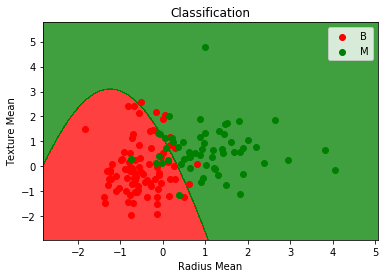

In [7]:
#visualize the classification
viz_cm(bayes_classifier, ["Radius Mean", "Texture Mean"])

In [14]:
# look at decision tree classifiers
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state = 1693, max_depth=5)
dt_classifier.fit(x_train, y_train)
dt_pred = dt_classifier.predict(x_test)

#look at the confusion matrix for our decision tree
dt_confMat = confusion_matrix(y_test, dt_pred)
print_cm(dt_confMat, ["Benign", "Malignant"])

                 Benign Malignant 
       Benign      79.0       6.0 
    Malignant       6.0      52.0 


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


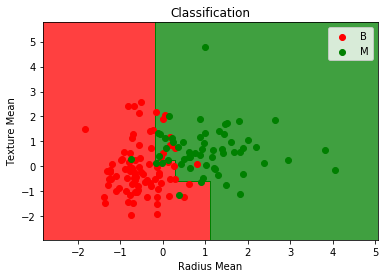

In [9]:
#visualize the confusion matrix
viz_cm(dt_classifier, ["Radius Mean", "Texture Mean"])

In [10]:
#visualize the decision tree itself
from sklearn import tree
tree.export_graphviz(dt_classifier, out_file="tree_dt.dot", feature_names = ["Radius Mean", "Texture Mean"])

#graphviz online website

In [11]:
#random forests
from sklearn.ensemble import RandomForestClassifier
rt_classifier = RandomForestClassifier(n_estimators = 1000, random_state = 1693, max_depth=3)
rt_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=1693, verbose=0,
            warm_start=False)

In [12]:
#display the confusion matrix
rt_pred = rt_classifier.predict(x_test)
rt_cm = confusion_matrix(y_test, rt_pred)
print_cm(rt_cm, ["Benign", "Malignant"])

                 Benign Malignant 
       Benign      79.0       6.0 
    Malignant       7.0      51.0 


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


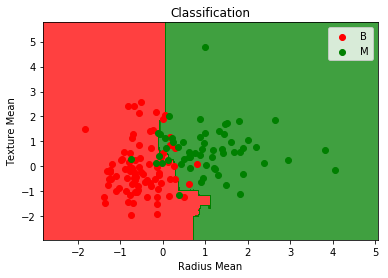

In [13]:
#visualize the confusion matrix
viz_cm(rt_classifier, ["Radius Mean", "Texture Mean"])